In [1]:
from data import SELL_PRICES
import pandas as pd

In [2]:
sellprices_df = pd.read_csv(SELL_PRICES)

/tmp/ipykernel_3272/2787002544.py:1: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  sellprices_df = pd.read_csv(SELL_PRICES)


In [3]:
sellprices_df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2022-1,2022-01-03,1,Vente,55000.0,13.0,NaN,RUE DE LA LIBERTE,2280,1000.0,...,Appartement,24.0,1.0,NaN,NaN,NaN,NaN,NaN,5.218706,46.198054
1,2022-2,2022-01-03,1,Vente,143000.0,NaN,NaN,CHAMP COCHET,B010,1480.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,84.0,4.847867,46.000617
2,2022-2,2022-01-03,1,Vente,143000.0,NaN,NaN,CHAMP COCHET,B010,1480.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,88.0,4.847920,46.000576
3,2022-2,2022-01-03,1,Vente,143000.0,98.0,NaN,RTE DE LA DOMBES,0055,1480.0,...,Appartement,140.0,3.0,NaN,NaN,NaN,NaN,NaN,4.848345,46.000585
4,2022-3,2022-01-04,1,Vente,300.0,NaN,NaN,AUX PIERRES,B031,1480.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,510.0,4.747627,46.045434


In [4]:
sellprices_df.dtypes

id_mutation                      object
date_mutation                    object
numero_disposition                int64
nature_mutation                  object
valeur_fonciere                 float64
adresse_numero                  float64
adresse_suffixe                  object
adresse_nom_voie                 object
adresse_code_voie                object
code_postal                     float64
code_commune                     object
nom_commune                      object
code_departement                 object
ancien_code_commune             float64
ancien_nom_commune               object
id_parcelle                      object
ancien_id_parcelle               object
numero_volume                    object
lot1_numero                      object
lot1_surface_carrez             float64
lot2_numero                      object
lot2_surface_carrez             float64
lot3_numero                      object
lot3_surface_carrez             float64
lot4_numero                     float64


In [16]:
# surface_terrain
# nombre_lots
# surface_reelle_bati
# valeur_fonciere
# nombre_pieces_principales

["surface_reelle_bati", "surface_terrain", "valeur_fonciere"]
print(len(sellprices_df))
df = sellprices_df.dropna(subset=["surface_reelle_bati", "surface_terrain", "valeur_fonciere"]).reset_index(drop=True)
print(len(df))

3803885
775596


In [17]:
df["m2_price"] = df["valeur_fonciere"] / df["surface_reelle_bati"]

In [19]:
df[["m2_price", "surface_reelle_bati", "surface_terrain", "valeur_fonciere", "longitude", "latitude"]].to_csv("../data/m2_price.csv")

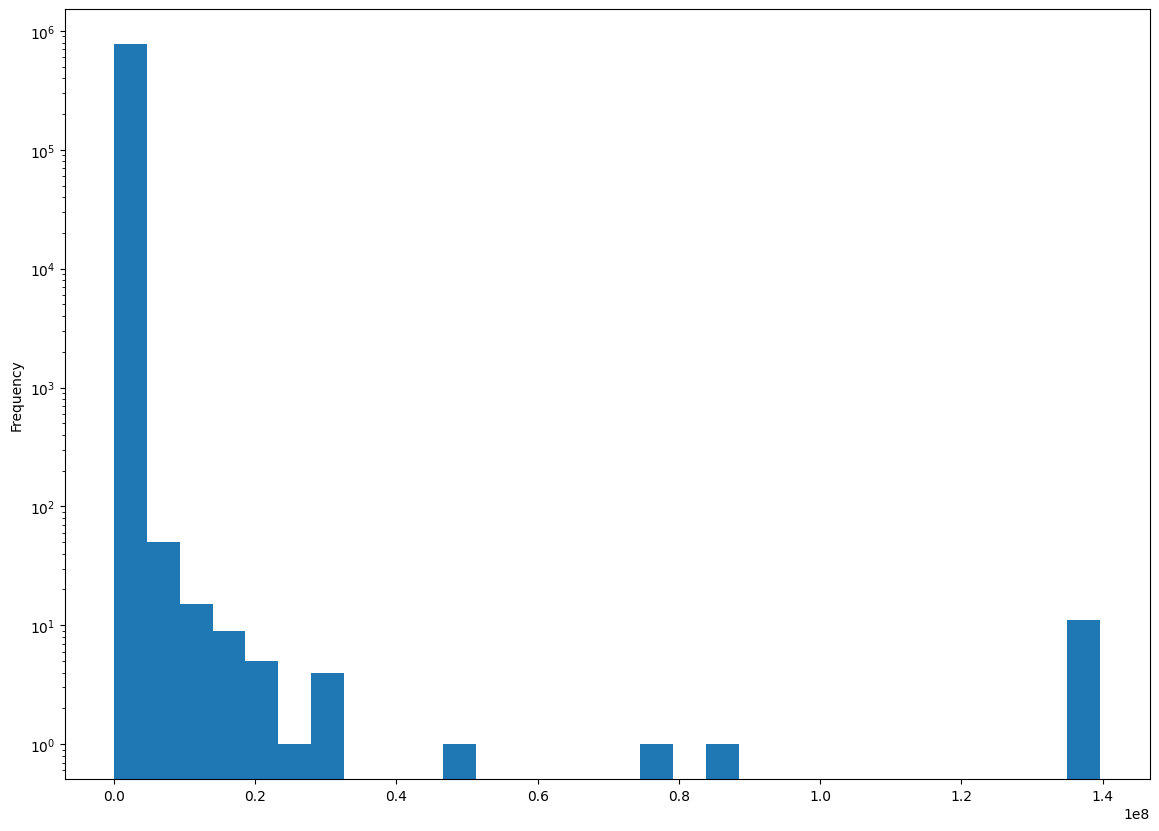

In [35]:
ax = df["m2_price"].plot.hist(figsize=(14,10), bins=30)
ax.set_yscale('log')

<Axes: ylabel='Frequency'>

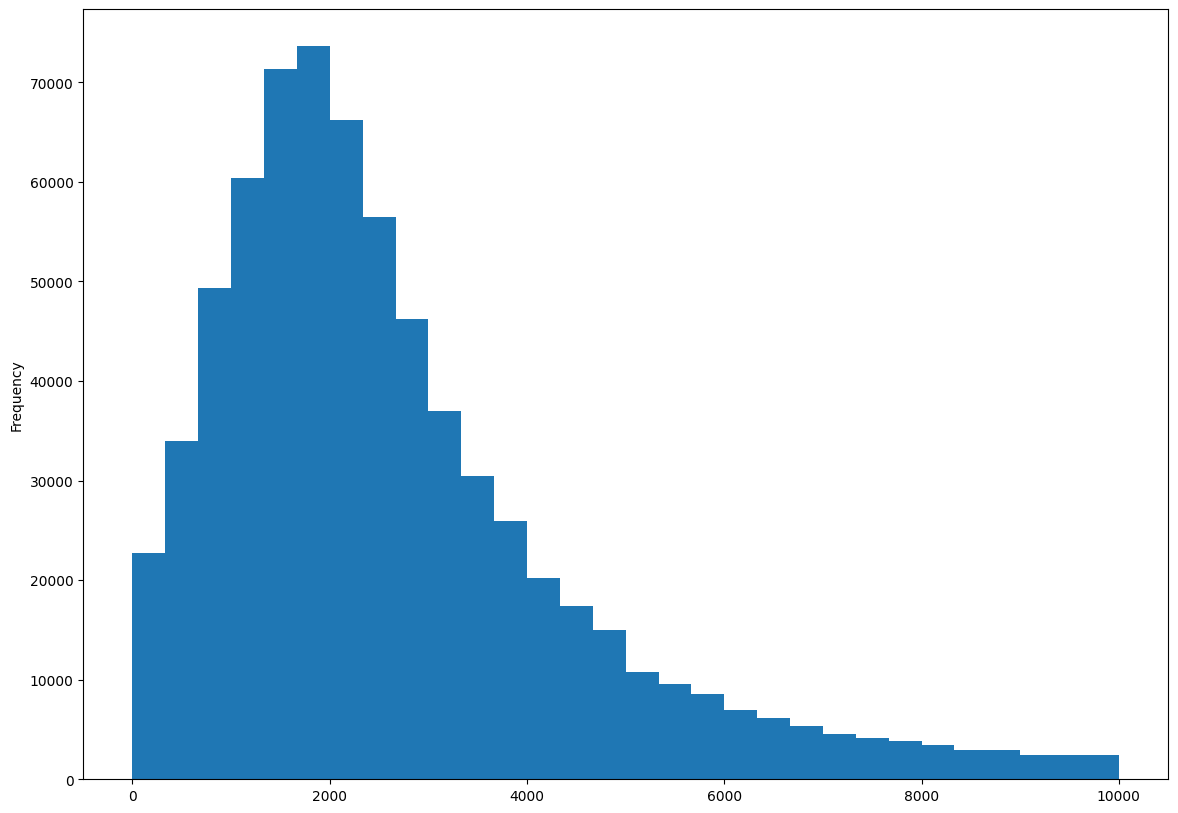

In [37]:
df[df["m2_price"] <= 1e4]["m2_price"].plot.hist(figsize=(14,10), bins=30)

In [38]:
df[df["m2_price"] <= 1e4].to_csv("m2_price_upto1e4.csv")